In [2]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('./placement.csv')

In [10]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [12]:
df.shape

(100, 4)

In [13]:
df = df.iloc[:,1:]

In [14]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [16]:
import matplotlib.pyplot as plt


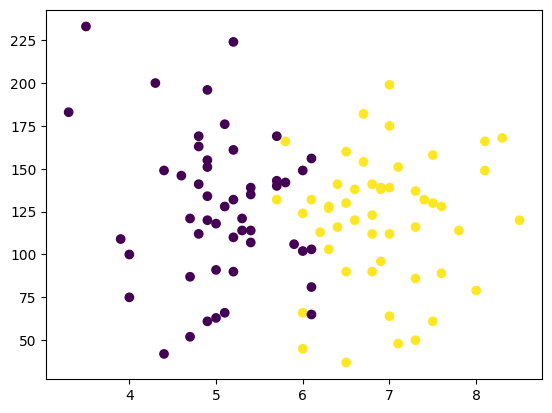

In [19]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [20]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
y.shape

(100,)

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [29]:
X_train

,cgpa,iq
12,5.4,139.0
7,5.0,63.0
80,4.9,196.0
23,4.7,87.0
24,4.7,121.0
...,...,...
56,6.1,65.0
32,7.0,139.0
69,8.5,120.0
99,6.2,113.0


In [30]:
y_train

12    0
7     0
80    0
23    0
24    0
     ..
56    0
32    1
69    1
99    1
65    1
Name: placement, Length: 90, dtype: int64

In [31]:
X_test

,cgpa,iq
11,6.9,138.0
72,7.3,116.0
4,5.8,142.0
19,5.2,132.0
38,6.5,160.0
42,7.6,89.0
49,5.4,135.0
29,7.0,112.0
95,4.3,200.0
15,5.1,176.0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [85]:
X_train

array([[-0.95129702,  1.77821321],
       [ 0.95129702,  1.26845696],
       [-0.49829844,  0.3945891 ],
       [-2.21969305,  2.67635518],
       [ 2.31029277, -0.06661894],
       [-1.49489532,  1.87530964],
       [-1.13249646, -1.71725823],
       [ 1.22309617, -0.16371537],
       [ 0.58889816, -0.06661894],
       [-0.49829844,  0.29749267],
       [ 1.22309617,  0.34604088],
       [-0.13589957,  0.46741142],
       [ 0.86069731,  0.37031499],
       [-0.22649929,  0.41886321],
       [ 0.31709901,  0.12757392],
       [ 0.31709901,  0.10329981],
       [-2.40089249,  1.46264982],
       [ 0.04529986, -1.88717698],
       [-1.04189674,  1.12281232],
       [-0.67949787,  0.22467035],
       [ 1.04189674, -1.81435466],
       [ 0.49829844,  0.17612213],
       [-0.58889816, -0.21226358],
       [ 1.22309617, -1.76580645],
       [-0.77009759,  0.12757392],
       [-0.95129702, -0.06661894],
       [ 0.22649929, -0.23653769],
       [-0.95129702, -1.49879127],
       [-0.67949787,

In [35]:
X_test = scaler.transform(X_test)

In [36]:
X_test

array([[ 0.80406126,  0.40386161],
       [ 1.15281072, -0.14309187],
       [-0.15499976,  0.5033077 ],
       [-0.67812395,  0.25469248],
       [ 0.4553118 ,  0.95081509],
       [ 1.41437282, -0.81435296],
       [-0.50374922,  0.32927704],
       [ 0.89124862, -0.24253796],
       [-1.46281024,  1.94527596],
       [-0.76531132,  1.34859944]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()

In [39]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = clf.predict(X_test)

In [41]:
y_test

11    1
72    1
4     0
19    0
38    1
42    1
49    0
29    1
95    0
15    0
Name: placement, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

1.0

In [45]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

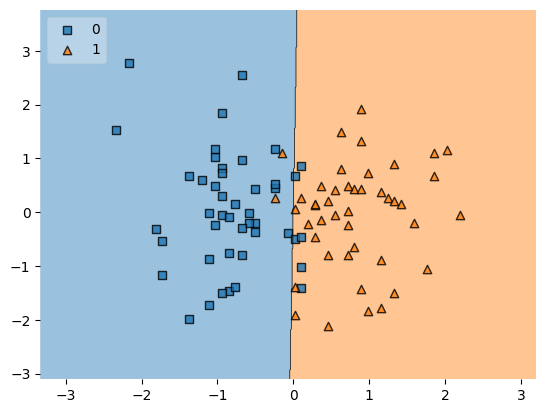

In [46]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [47]:
import pickle

In [48]:
pickle.dump(clf,open('model.pkl','wb'))